<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<img src="forest.jpg" width="500" height="600" />

**Digits dataset from sklearn**

In [3]:
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

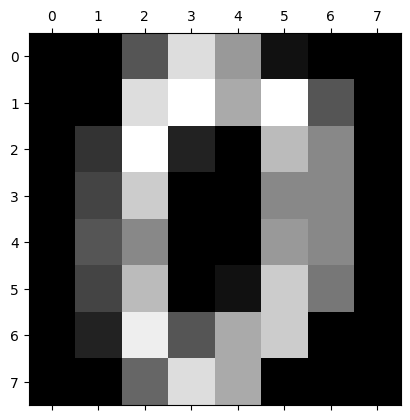

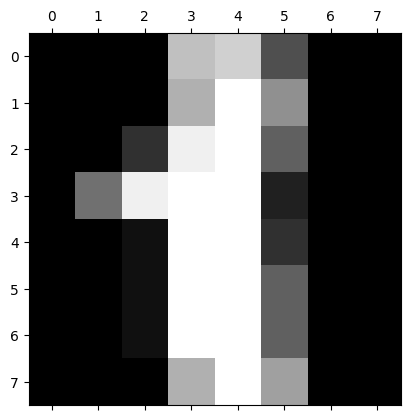

In [9]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [12]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [16]:
x=df.drop('target',axis='columns')
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
y=df.target
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

**Train and the model and prediction**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
len(x_train)

1437

In [20]:
len(x_test)

360

In [21]:
len(x)

1797

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
model.predict(x_test)

array([7, 8, 1, 0, 1, 4, 0, 7, 6, 7, 5, 3, 3, 4, 8, 7, 1, 0, 9, 3, 4, 4,
       4, 9, 7, 7, 1, 5, 3, 8, 8, 1, 0, 0, 0, 3, 5, 7, 7, 3, 6, 7, 1, 5,
       4, 1, 4, 2, 5, 0, 7, 4, 3, 6, 6, 0, 7, 9, 1, 2, 8, 3, 7, 3, 6, 5,
       2, 8, 1, 8, 8, 9, 7, 2, 5, 4, 1, 9, 3, 4, 7, 9, 9, 4, 5, 2, 9, 3,
       4, 7, 5, 5, 4, 3, 3, 9, 0, 5, 2, 8, 2, 3, 4, 3, 4, 2, 1, 4, 4, 6,
       9, 8, 4, 3, 6, 6, 7, 5, 3, 1, 4, 5, 4, 9, 6, 8, 2, 8, 9, 0, 4, 4,
       2, 1, 1, 8, 8, 5, 2, 5, 7, 0, 9, 2, 4, 4, 9, 5, 9, 1, 2, 1, 6, 2,
       1, 4, 9, 1, 7, 1, 5, 1, 2, 9, 8, 6, 9, 2, 3, 1, 1, 5, 2, 0, 5, 6,
       3, 8, 1, 1, 5, 3, 0, 6, 3, 1, 0, 1, 0, 9, 2, 5, 6, 4, 7, 3, 2, 0,
       7, 0, 8, 7, 0, 7, 4, 8, 8, 8, 1, 4, 3, 7, 0, 0, 0, 2, 9, 5, 6, 9,
       6, 0, 8, 9, 6, 1, 7, 0, 4, 8, 4, 9, 0, 2, 7, 8, 0, 8, 2, 7, 3, 1,
       7, 0, 9, 5, 3, 6, 9, 1, 1, 0, 1, 1, 5, 3, 6, 6, 1, 5, 5, 7, 6, 2,
       5, 2, 7, 2, 9, 4, 0, 0, 3, 8, 8, 2, 8, 2, 9, 0, 0, 9, 5, 8, 0, 0,
       0, 8, 0, 7, 6, 1, 6, 3, 2, 8, 4, 7, 0, 6, 6,

In [24]:
model.score(x_test,y_test)

0.9833333333333333

In [25]:
y_predicted=model.predict(x_test)

**Confusion Matrix**

In [27]:
from sklearn.metrics import confusion_matrix
md=confusion_matrix(y_test,y_predicted)
md

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  2,  1,  1],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 30]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

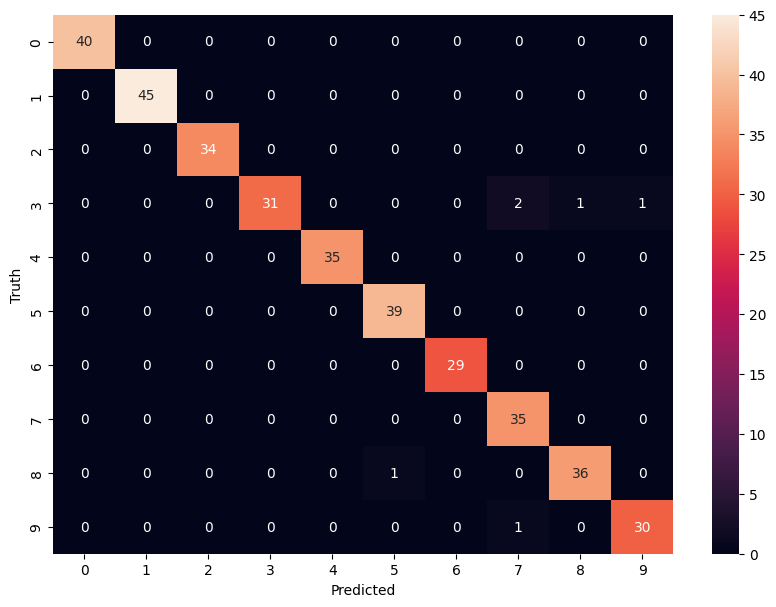

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(md, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')